In [1]:
import pandas as pd

In [16]:
import numpy as np

In [14]:
tab1 = pd.read_csv("../data/Table2.csv")
tab1

,DegreeOrigin,DegreeReal,Count
0,22,20,99
1,27,25,25
2,32,30,6
3,37,35,10
4,42,40,2
5,47,45,9
6,52,50,8956


In [15]:
tab1.to_latex("../Report/Tab4.tex",index=False)

In [25]:
Y = np.array([99,25,6,10,2,9]) - np.array([81,16,5,1,0,0])
Theta = np.array([20,25,30,35,40,45])
X = 1/np.sin(np.deg2rad(Theta/2))**4

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use("seaborn-paper")
mpl.rcParams.update({
    'font.family': 'STIXGeneral',
    # 'font.sans-serif': ['Times New Roman'],
    'mathtext.default':'rm',
    'mathtext.fontset':'stix',
    'mathtext.fallback_to_cm':False,
    "axes.titlesize" : 24,
"axes.labelsize" : 20,
"lines.linewidth" : 3,
"lines.markersize" : 10,
"xtick.labelsize" : 18,
"ytick.labelsize" : 18,
'savefig.dpi':300,
'legend.fontsize':20,
'figure.figsize':(8,6)
    })
plt.rcParams['axes.unicode_minus'] = False

/usr/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/usr/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


In [22]:
X

array([18,  9,  1,  9,  2,  9])

In [23]:
import statsmodels.api as sm

In [26]:
X_ = sm.add_constant(X)
model = sm.OLS(Y,X_)
result = model.fit()
result.summary()

/home/sitianq/.local/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     6.229
Date:                Tue, 18 May 2021   Prob (F-statistic):             0.0671
Time:                        17:00:45   Log-Likelihood:                -16.031
No. Observations:                   6   AIC:                             36.06
Df Residuals:                       4   BIC:                             35.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9945      2.375      1.682      0.168      -2.598      10.587
x1             0.0119      0.005      2.496      0.067      -0.001       0.025
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.834
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.424
Skew:                          -0.271   Prob(JB):                        0.809
Kurtosis:                       1.815   Cond. No.                         676.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

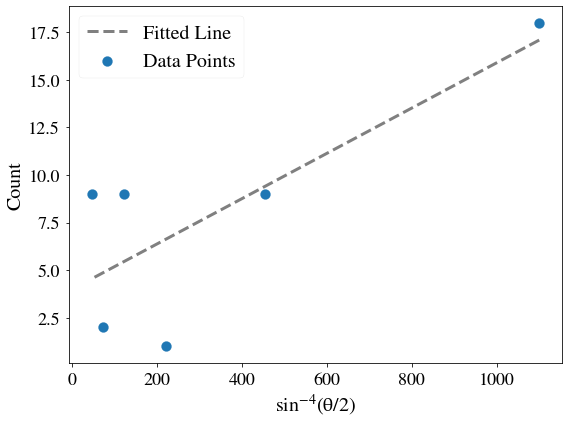

In [32]:
plt.scatter(X,Y,label="Data Points")
plt.plot(X,X*0.0119+3.9945,"--",color = 'gray',label="Fitted Line")
plt.xlabel("$\\sin^{-4}(\\theta/2)$")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/Fit.pdf")